In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [13]:
THETA = 7.39
evals = np.load(f"/Users/jonathanlu/Documents/tvGr/evals/evals_{THETA}.npy")
evals.shape

(301, 84)

## MD

In [14]:
## MD
# Load the displacements, indexed by atomic index
data = np.loadtxt('/Users/jonathanlu/Documents/tvGr/MD/Phonon_dispersion.dat')
x, y = data.T
y *= 8.066 # meV -> 1/cm

## DFT

In [29]:
DFT = np.loadtxt('/Users/jonathanlu/Documents/tvGr/DFT/bands.txt')

Minimum mode: -11.17706499836328


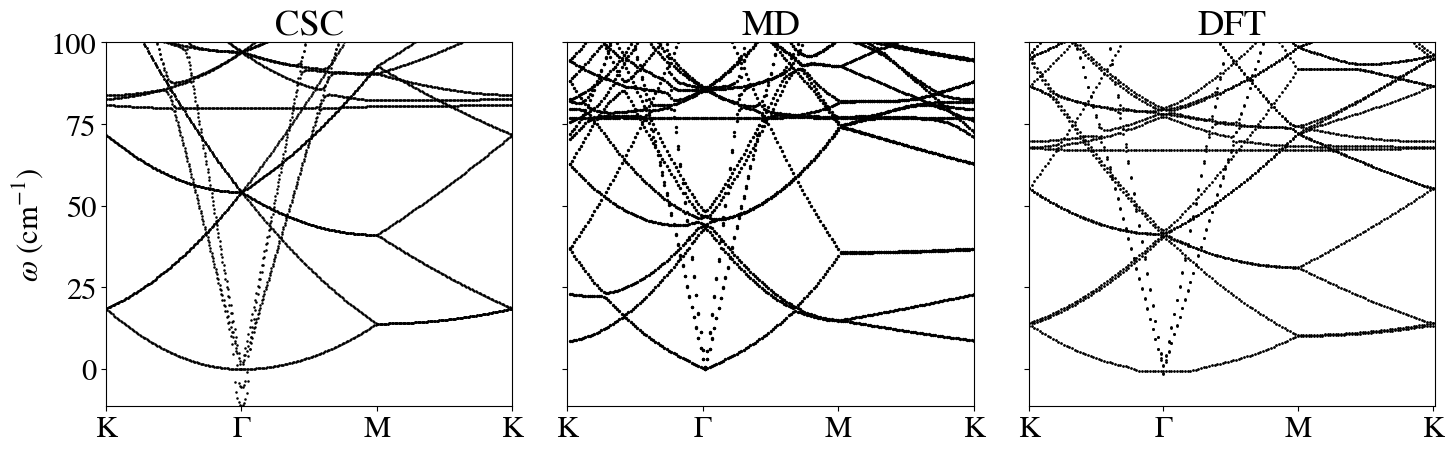

In [39]:

signs = (evals < 0)*(-1) + (evals >= 0)*1
modes = np.sqrt(np.abs(evals)) * signs
print(f"Minimum mode: {np.min(modes)}")

# make the default Font latex
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

# Plot CSC
_, (ax, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
plt.rc('font', size=22)
for i, L_set in enumerate(modes):
    ax.scatter([i]*len(L_set), L_set, c='k', s=0.7)
ax.set_ylim(bottom=np.min(modes), top=100)
ax.set_xlim(0, len(evals)-1)
ax.set_ylabel(r"$\omega$ (cm$^{-1}$)")
ax.set_xticks([0, 100, 200, 300])
ax.set_xticklabels(['K', r'$\Gamma$', 'M', 'K'])
# plt.xticks([0, 100, 200, 300], labels=[])
ax.set_title("CSC")

# PLOT MD
ax2.scatter(x, y, c='k', s=2)
ax2.set_xlim(np.min(x), np.max(x))
ax2.set_xticks([0, 60, 120, 180])
ax2.set_xticklabels(['K', r'$\Gamma$', 'M', 'K'])
ax2.set_ylim(ax.get_ylim())
ax2.set_yticklabels([])
ax2.set_title("MD")

# PLOT DFT
for i, pts in enumerate(DFT):
    ax3.scatter([i]*len(pts), pts, c='k', s=1)
ax3.set_xlim(0, len(DFT))
ax3.set_xticks([0, 50, 100, 150])
ax3.set_xticklabels(['K', r'$\Gamma$', 'M', 'K'])
ax3.set_ylim(ax.get_ylim())
ax3.set_yticklabels([])
ax3.set_title("DFT")

props = dict(boxstyle='round', facecolor='lightblue', alpha=1)
plt.tight_layout()
plt.savefig(f"/Users/jonathanlu/Documents/data_mlph/Gr_MDCSCband_{THETA}.pdf")
plt.show()